import librabry

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


2026-02-09 08:45:51.220585: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load Fashion-MNIST Dataset

In [ ]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Normalize Data

In [3]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


Create Model

In [4]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


compile model

In [5]:

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


Train Model

In [6]:

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.1,
    verbose=0
)


Evaluate Model

In [7]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)


Test accuracy: 0.8772000074386597


Show Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


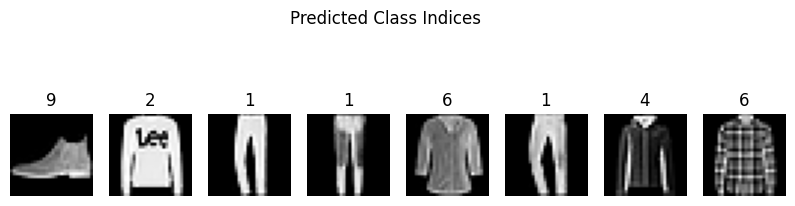

In [8]:

preds = model.predict(x_test[:8]).argmax(axis=1)

plt.figure(figsize=(10, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(int(preds[i]))
    plt.axis("off")

plt.suptitle("Predicted Class Indices")
plt.show()
